In [1]:
# reload modules if they are changed
%load_ext autoreload
%autoreload 2

import os
os.sys.path.insert(0, "/gpfs/soma_fs/scratch/meulemeester/project_src/in_silico_framework/project_specific_ipynb_code/bottleneck_project") # so VScode know to look here for modules
os.sys.path.insert(0, "/gpfs/soma_fs/scratch/meulemeester/project_src/in_silico_framework") # so VScode know to look here for modules

# wildcard imports are frowned upon, but oh well, everything is self-contained in this folder anyways
from helper_functions import *
from decoder_helper_functions import *
from viz import *
from data_helper_functions import *
import model_data_base
import Interface as I

print("Cuda is available: "+str(torch.cuda.is_available()))

/gpfs/soma_fs/scratch/meulemeester/project_src/in_silico_framework/model_data_base/distributed_lock.py:11: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


trying to connect to distributed locking server {'config': {'hosts': 'somalogin02-hs:33333'}, 'type': 'zookeeper'}
success!
Current version: v0.0.1+1011.g0ab6a89.dirty
Current pid: 49223


/gpfs/soma_fs/scratch/meulemeester/anaconda_isf3/lib/python3.8/site-packages/pandas_msgpack-0.1.4+14.gfcb0471.dirty-py3.8-linux-x86_64.egg/pandas_msgpack/packers.py:78: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import (Timestamp, Period, Series, DataFrame,  # noqa
/gpfs/soma_fs/scratch/meulemeester/project_src/in_silico_framework/Interface.py:180: UserWarning: The source folder has uncommited changes!
  if get_versions()['dirty']: warnings.warn('The source folder has uncommited changes!')


Loading mechanisms:
setting up local multiprocessing framework ... done


Loaded modules with __version__ attribute are:
IPython: 7.19.0, Interface: v0.0.1+1011.g0ab6a89.dirty, PIL: 8.2.0, _csv: 1.0, _ctypes: 1.1.0, _curses: b'2.2', _decimal: 1.70, argparse: 1.1, backcall: 0.2.0, blosc: 1.10.2, bluepyopt: 1.9.126, bottleneck: 1.3.2, cffi: 1.14.3, click: 7.1.2, cloudpickle: 1.6.0, colorama: 0.4.4, csv: 1.0, ctypes: 1.1.0, cycler: 0.10.0, cytoolz: 0.11.0, dask: 2.30.0, dateutil: 2.8.1, deap: 1.3, decimal: 1.70, decorator: 4.4.2, distributed: 2.30.1, distutils: 3.8.5, fsspec: 0.8.3, future: 0.18.2, ipykernel: 5.3.4, ipython_genutils: 0.2.0, ipywidgets: 7.6.5, jedi: 0.17.1, jinja2: 2.11.2, joblib: 0.17.0, json: 2.0.9, jupyter_client: 6.1.7, jupyter_core: 4.6.3, kazoo: 2.8.0, kiwisolver: 1.3.0, logging: 0.5.1.2, markupsafe: 1.1.1, matplotlib: 3.3.2, mkl: 2.3.0, neuron: 7.8.2, numexpr: 2.7.1, numpy: 1.19.2, pandas: 1.1.3, pandas_msgpack: 0.1.4+14.gfcb0471.dirty, parameters: 0.2.1, parso: 0.7

In [25]:
# ip adress of running node
ip = "10.102.3.88"

In [6]:
register_databases(ip)  # change this IP every time

registering database with unique_id 2022-08-29_117057_mvi4MLC to the absolute path /gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations
registering database with unique_id 2022-08-29_139830_1aB8K0e to the absolute path /gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations/mdbs_qr8fqtte_/mdb
registering database with unique_id 2022-09-07_148835_MCLAx5Q to the absolute path /gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations/mdbs_qr8fqtte_/mdb/example_in_distribution_simulation_1ms_inh_adapt_i_i2melyug_/mdb
registering database with unique_id 2022-09-16_72225_QtIPT5M to the absolute path /gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations/mdbs_qr8fqtte_/mdb/example_in_distribution_simulation_1ms_inh_adapt_i_i2melyug_/mdb/reduced_ann_models5_9gopetp1_/mdb


In [ ]:
client = I.distributed.Client(ip+':38786')  # this adress changes depending on which node you're using
client

In [5]:
# init mdb for which batches should be generated
mdb = I.ModelDataBase('/gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations/')
mdb._register_this_database()
mdb = mdb['mdbs']
mdb._register_this_database()
mdb = mdb['example_in_distribution_simulation_1ms_INH_adapt_inh_v2.6_shift-3_offset_445_280000_trials']
mdb._register_this_database()
mdb_models = mdb['reduced_ANN_models5']
mdb_models._register_this_database()

batches_dir = mdb[('synapse_activation_binned_v2', '365_505_1', 'EI__section/branch_bin')]

registering database with unique_id 2022-08-29_117057_mvi4MLC to the absolute path /gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations
registering database with unique_id 2022-08-29_139830_1aB8K0e to the absolute path /gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations/mdbs_qr8fqtte_/mdb
registering database with unique_id 2022-09-07_148835_MCLAx5Q to the absolute path /gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations/mdbs_qr8fqtte_/mdb/example_in_distribution_simulation_1ms_inh_adapt_i_i2melyug_/mdb
registering database with unique_id 2022-09-16_72225_QtIPT5M to the absolute path /gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations/mdbs_qr8fqtte_/mdb/example_in_distribution_simulation_1ms_inh_adapt_i_i2melyug_/mdb/reduced_ann_models5_9gopetp1_/mdb


In [6]:
batches_dir.join()

'/gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations/mdbs_qr8fqtte_/mdb/example_in_distribution_simulation_1ms_inh_adapt_i_i2melyug_/mdb/synapse_activation_binned_v2-365_505_1-ei__section_2p8h04xs_'

In [7]:
model_data_base.mdbopen.resolve_mdb_path('mdb://2022-08-29_117057_mvi4MLC/morphologies/WR64_Cell8/recSites.landmarkAscii')
mdb_dinuka = I.ModelDataBase('/gpfs/soma_fs/scratch/jayalath/mdb_dinuka/300_epoch_retrain')
mdb_models_dinuka = mdb_dinuka['retrain_test_5_times_300_epochs']
mdb_models_arco = mdb['reduced_ANN_models5']

In [8]:
model_dinuka = 'loss_sAP__bn_1__ISIsd__width_min_max_80_0_60__decoder_5x40__L2_0.001_L1_0_TV_0.001__epochs_300__batches_200__ntrials_280000__traintest_260000_20000__CTY70'
model_arco = 'loss_sAP__bn_1__ISIsd__width_min_max_80_0_60__decoder_5x40__L2_0.001_L1_0_TV_0.001__epochs_300__batches_200__ntrials_280000__traintest_260000_20000__1HOE2'

In [9]:
client = I.distributed.Client(ip+':38786')
client

Client Scheduler: tcp://10.102.3.88:38786 Dashboard: http://10.102.3.88:38787/status,Cluster Workers: 48 Cores: 48 Memory: 4.80 TB


# Visualize the weights

In [8]:
# define params to visualize the weights
params={
    "n_celltypes": 2,
    "n_spatial_bins": 260,
    "temporal_window_width": 80,
    "weight_scaling": 1
}

show_bins = False
bottleneck_size = 1
celltype = 0 # EXC or INH in the plot
ts = range(params["temporal_window_width"])
t = 70

In [9]:
from viz import WeightPlot
WP = WeightPlot(mdb)

-------------------------------
Starting setup of cell model...
Loading cell morphology...
Reading hoc file mdb://2022-08-29_117057_mvi4MLC/morphologies/WR64_Cell8/WR64_Cell8_L5TT_C2-registered.hocwith_radius_constant_mean.hoc
Creating AIS:
    axon hillock diameter: 3.00
    initial segment diameter: 1.75
    myelin diameter: 1.00
Setting up biophysical model...
    Adding membrane properties to Myelin
    Adding membrane properties to Soma
    Adding membrane properties to AIS
    Adding membrane properties to Dendrite
    Adding membrane properties to ApicalDendrite
    Setting up spatial discretization...
    frequency used for determining discretization: 100.0
    maximum segment length: None
    Total number of compartments in model: 830
    Total length of model cell: 10451.70
    Average compartment length: 12.59
    Maximum compartment (ApicalDendrite) length: 40.81
    Adding membrane range mechanisms to Myelin
        Inserting mechanism pas with spatial distribution uniform

torch.Size([1, 41600])


<Figure size 720x360 with 0 Axes>

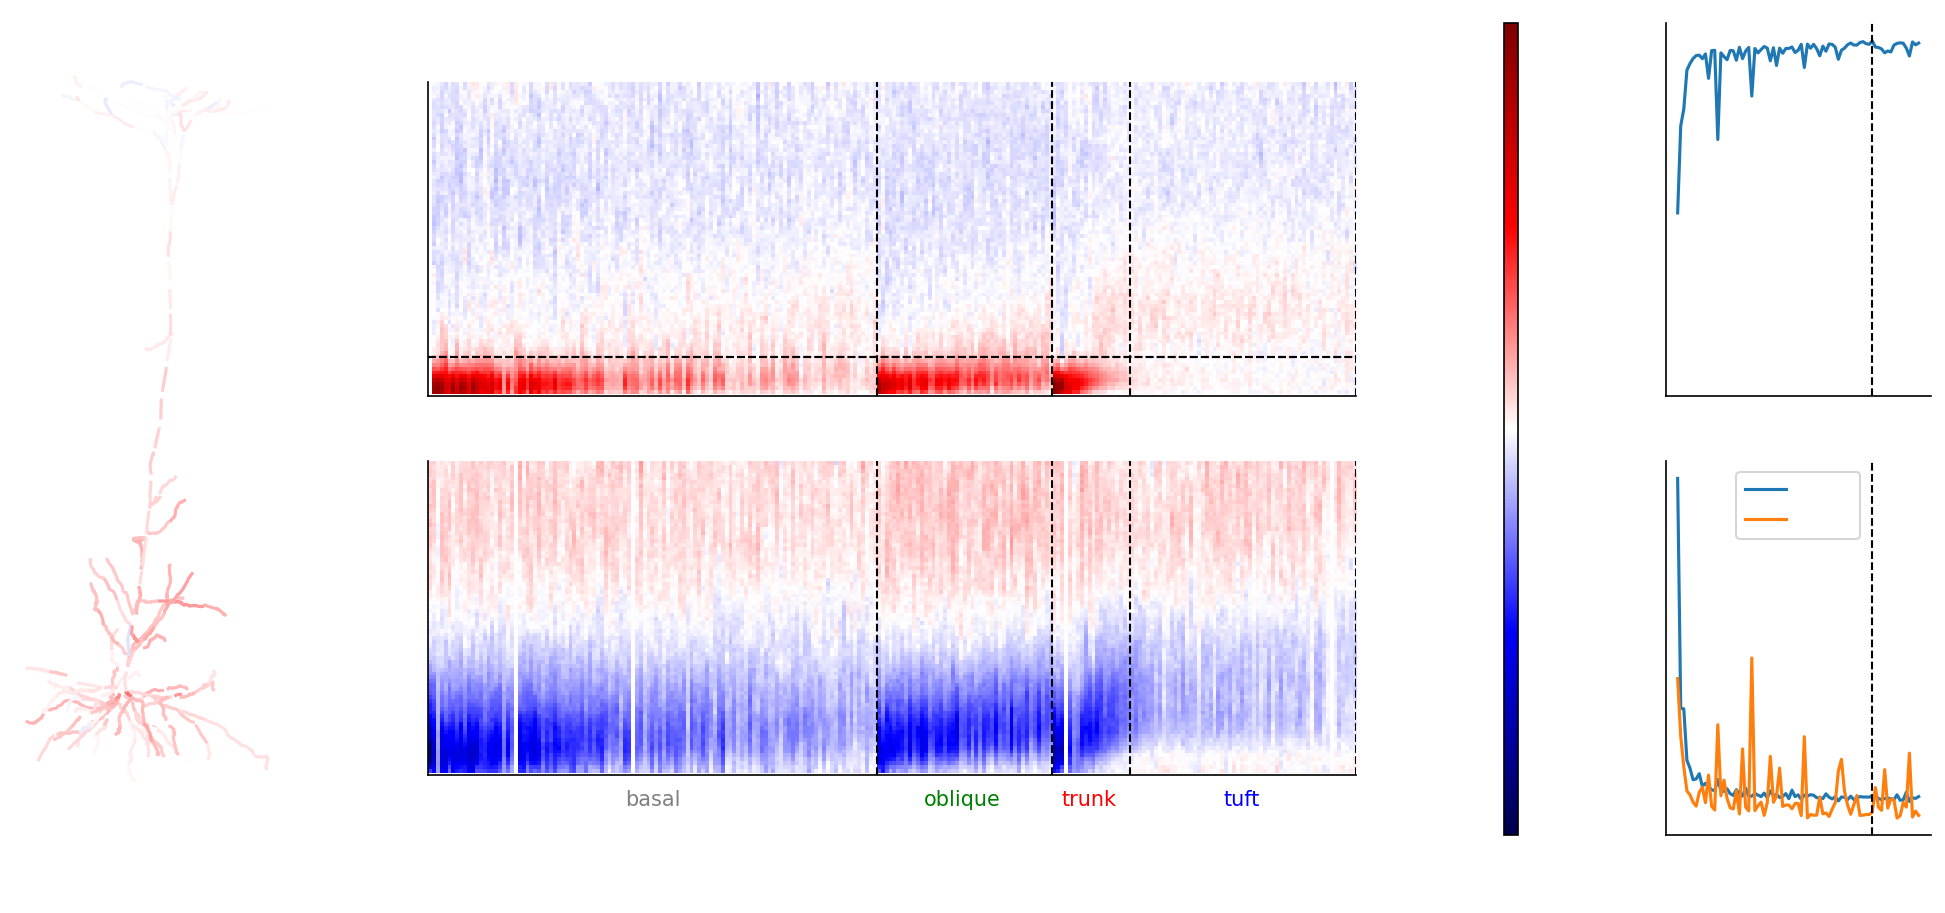

In [18]:
%matplotlib inline
import matplotlib as mpl
COLOR = 'white'  # for VSCode
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
epochs, i, AUCs, train_loss, test_loss, weights = get_model_stats(mdb_models_dinuka, model_dinuka)

bottleneck_node = 0

I.plt.figure(figsize = (10,5))
axes = WP.plot_weights(weights, **params, categories=False, AUCs=AUCs, train_loss=train_loss, test_loss=test_loss, celltype=celltype, t=t)
title = 'history: {} ms'.format(-ts[t]-1)
axes[0,1].set_title(title)
axes[0,3].axvline(i-1, color = 'k', linestyle = '--', linewidth = 1)
axes[1,3].axvline(i-1, color = 'k', linestyle = '--', linewidth = 1)
axes[celltype,1].axhline(t, color = 'k', linestyle = '--', linewidth = 1)

I.plt.show()

torch.Size([1, 41600])


<Figure size 720x360 with 0 Axes>

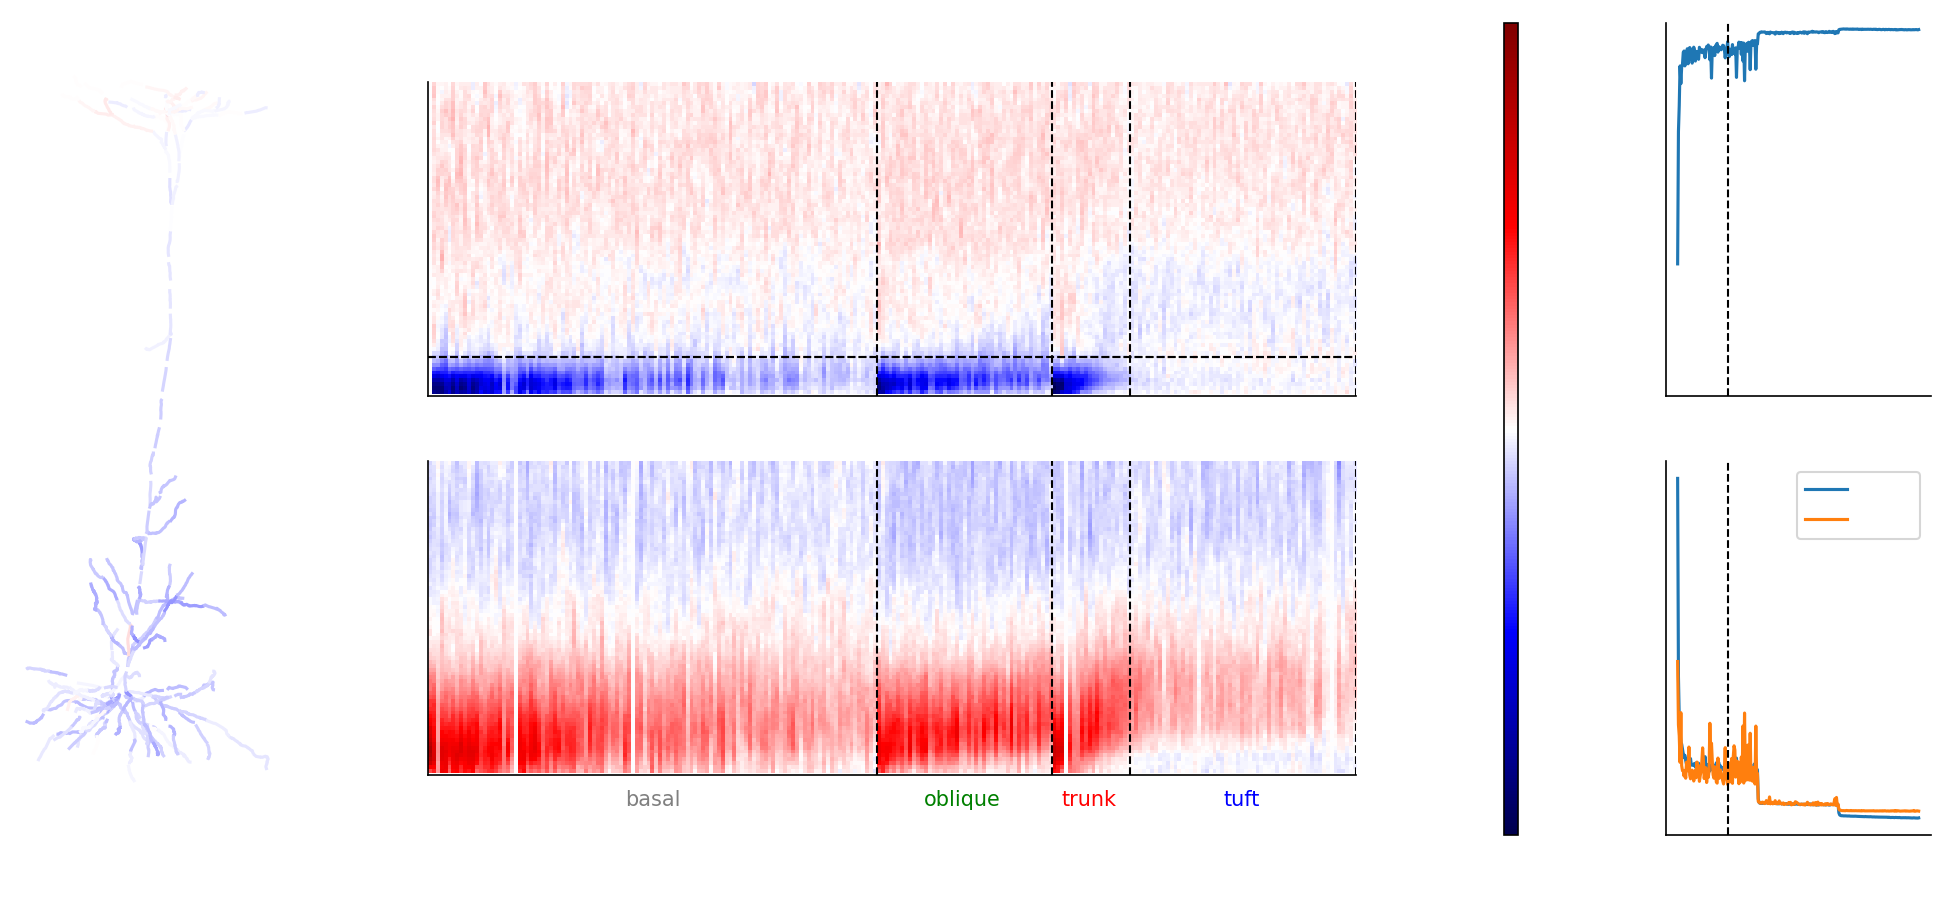

In [19]:
i = 64  # best_epoch
bottleneck_node = 0
epochs, i, AUCs, train_loss, test_loss, weights = get_model_stats(mdb_models_arco, model_arco, best_epoch=i, bottleneck_node=bottleneck_node)


I.plt.figure(figsize = (10,5))
axes = WP.plot_weights(weights, **params, categories=False, AUCs=AUCs, train_loss=train_loss, test_loss=test_loss, celltype=celltype, t=t)
title = 'history: {} ms'.format(-ts[t]-1)
axes[0,1].set_title(title)
axes[0,3].axvline(i-1, color = 'k', linestyle = '--', linewidth = 1)
axes[1,3].axvline(i-1, color = 'k', linestyle = '--', linewidth = 1)
axes[celltype,1].axhline(t, color = 'k', linestyle = '--', linewidth = 1)

I.plt.show()

torch.Size([1, 41600])


<Figure size 720x360 with 0 Axes>

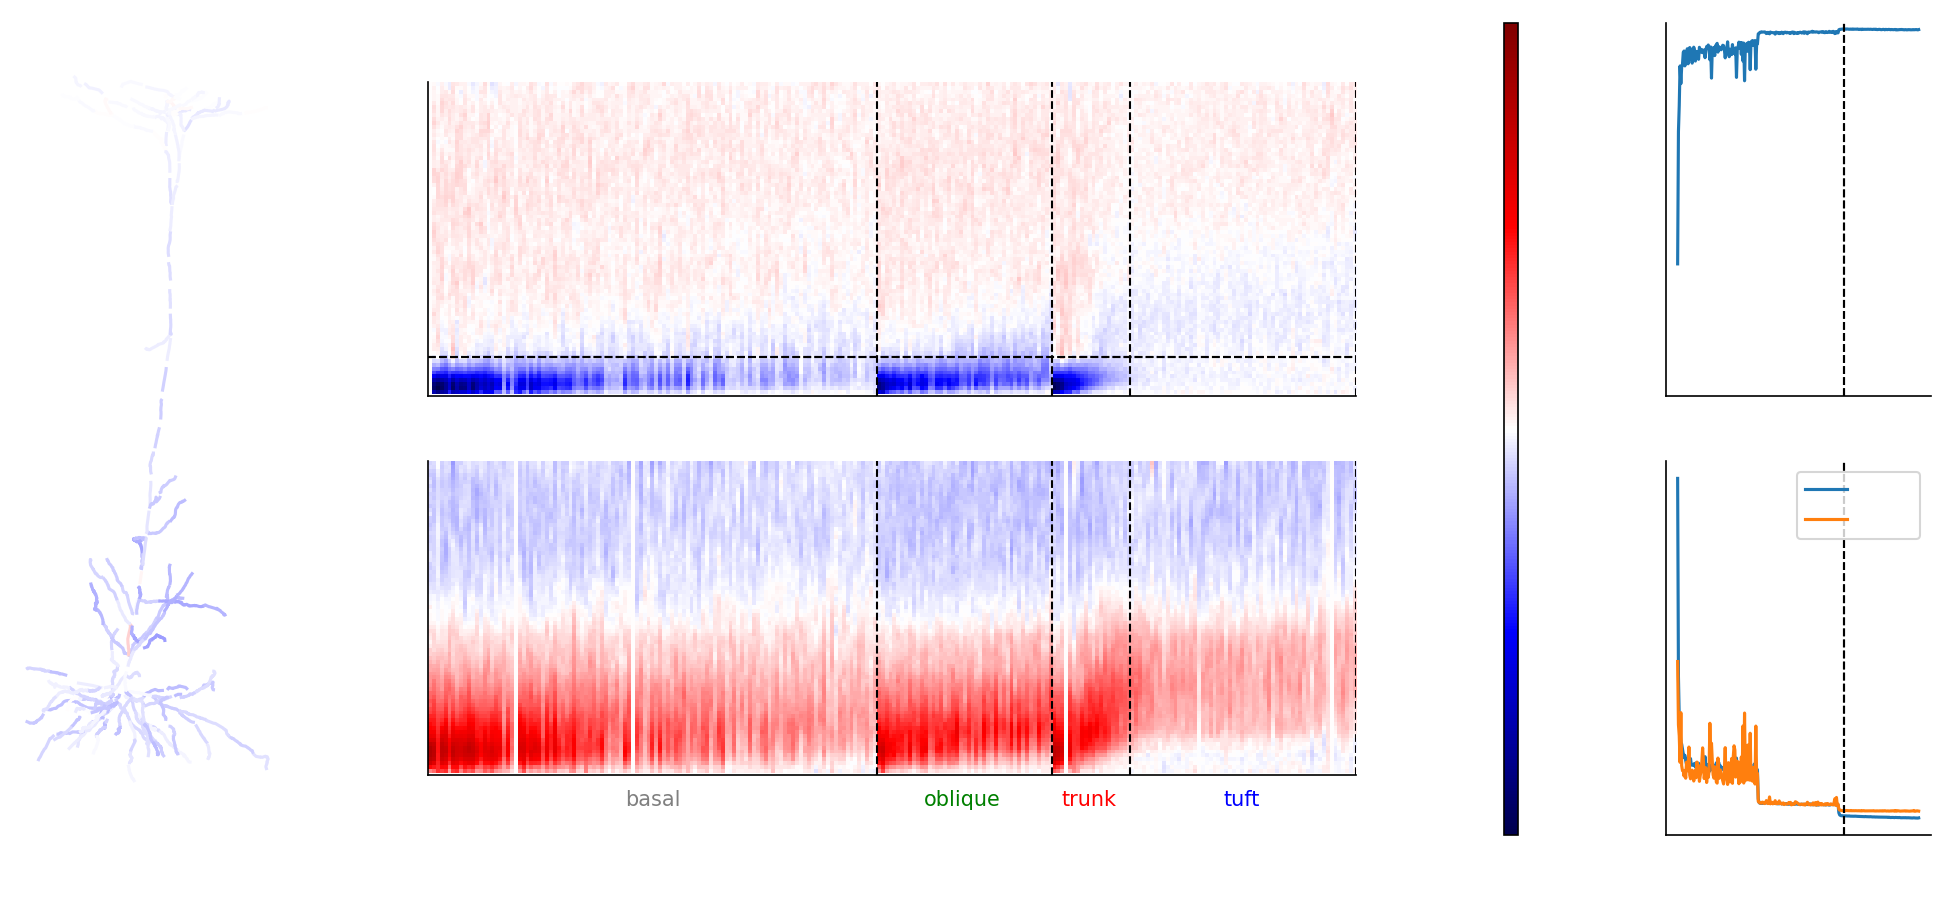

In [20]:
epochs, i, AUCs, train_loss, test_loss, weights = get_model_stats(mdb_models_arco, model_arco)

bottleneck_node = 0

I.plt.figure(figsize = (10,5))
axes = WP.plot_weights(weights, **params, categories=False, AUCs=AUCs, train_loss=train_loss, test_loss=test_loss, celltype=celltype, t=t, i=i)
title = 'history: {} ms'.format(-ts[t]-1)
axes[0,1].set_title(title)
axes[0,3].axvline(i-1, color = 'k', linestyle = '--', linewidth = 1)
axes[1,3].axvline(i-1, color = 'k', linestyle = '--', linewidth = 1)
axes[celltype,1].axhline(t, color = 'k', linestyle = '--', linewidth = 1)

I.plt.show()

In [ ]:
# make a video
# def plot_weights_at_t(t):
#     epochs, i, AUCs, train_loss, test_loss, weights = get_model_stats(mdb_models_arco, model_arco)
#     WP.plot_weights(weights, **params, categories=False, AUCs=AUCs, train_loss=train_loss, test_loss=test_loss, celltype=celltype, t=t,
#                           return_axes=False)  # to make interactive plot
#     I.plt.title(f"Time: {t}")
#     I.plt.savefig("frames/{:03d}.png".format(t), dpi=100)
#     I.plt.close()
    
# for t in range(80):
#     plot_weights_at_t(t)

torch.Size([2, 41600])


<Figure size 720x360 with 0 Axes>

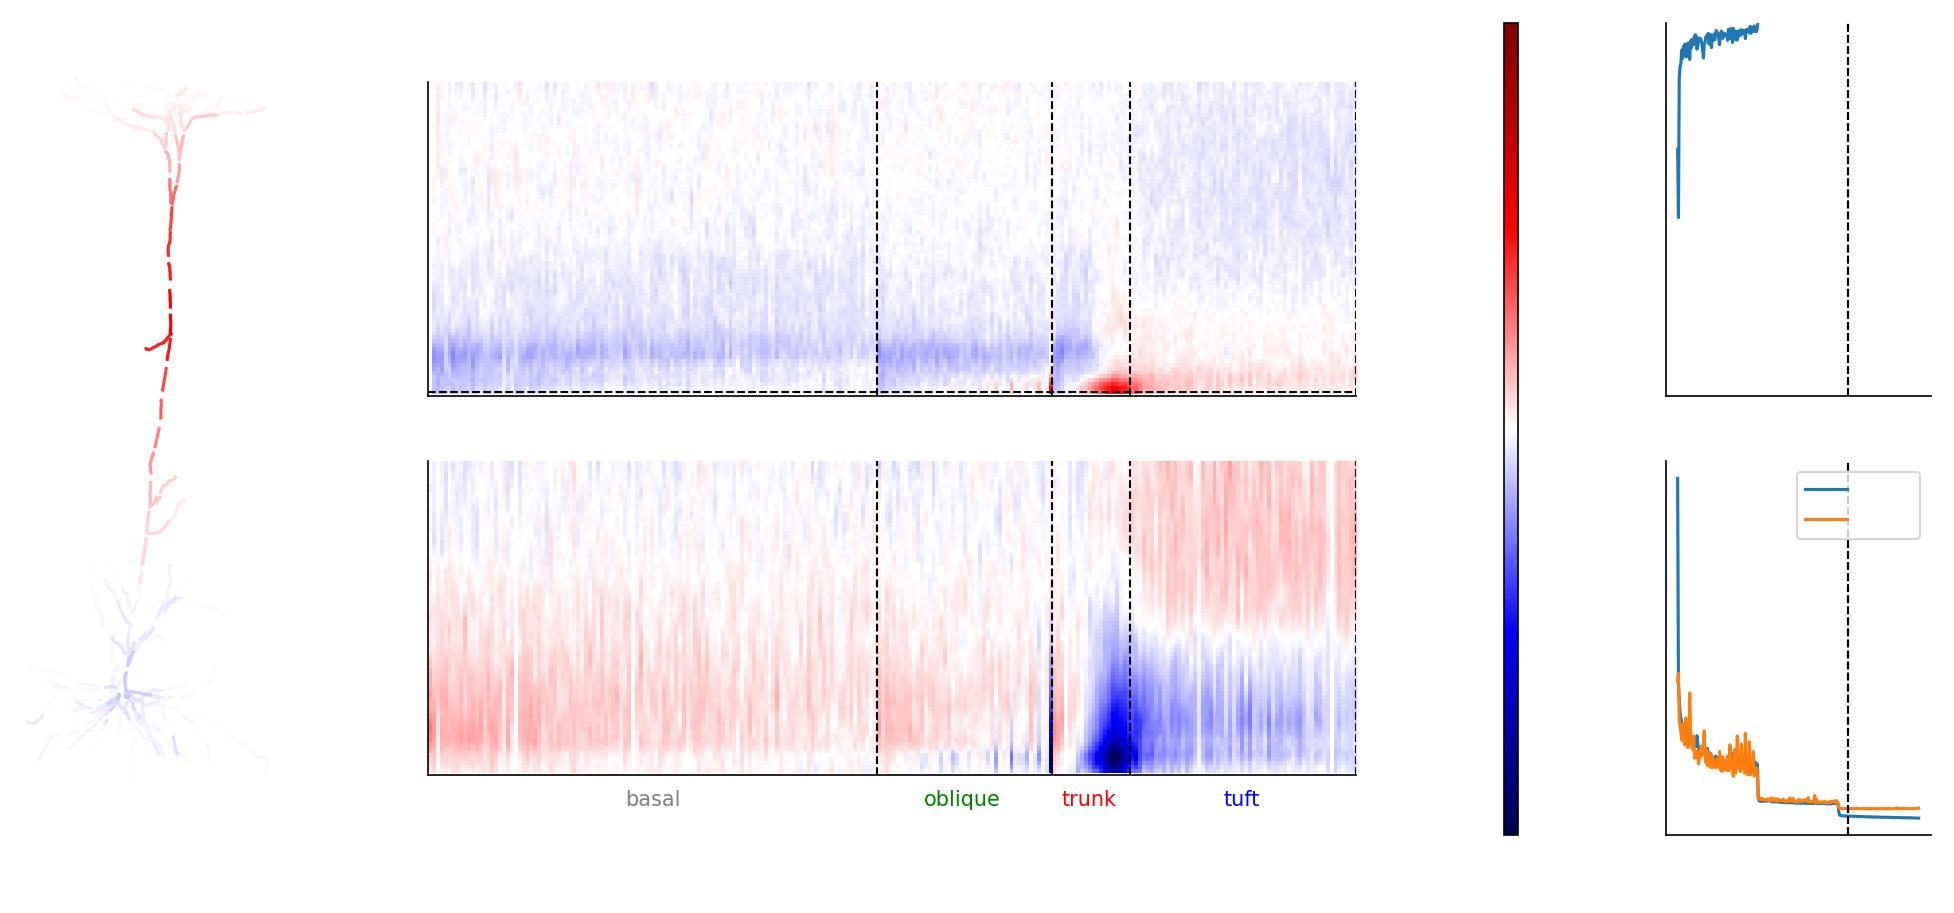

In [53]:
model_arco_2layer = "loss_sAP_dAP__bn_2__ISIsd__width_min_max_80_0_60__decoder_5x40__L2_0.001_L1_0_TV_0.001__epochs_300__batches_200__ntrials_280000__traintest_260000_20000__MD4TW"

epochs, i, AUCs, train_loss, test_loss, weights = get_model_stats(mdb_models_arco, model_arco_2layer, bottleneck_node=0)


I.plt.figure(figsize = (10,5))
axes = WP.plot_weights(weights, **params, categories=False, AUCs=AUCs, train_loss=train_loss, test_loss=test_loss, celltype=celltype, t=79, i=i)
title = 'history: {} ms'.format(-ts[t]-1)
axes[0,1].set_title(title)
axes[0,3].axvline(i-1, color = 'k', linestyle = '--', linewidth = 1)
axes[1,3].axvline(i-1, color = 'k', linestyle = '--', linewidth = 1)

I.plt.show()

# Visualizing the decoder network

In [9]:
from decoder_helper_functions import forward, forward_bottleneck, forward_decoder

In [10]:
model_arco = 'loss_sAP__bn_1__ISIsd__width_min_max_80_0_60__decoder_5x40__L2_0.001_L1_0_TV_0.001__epochs_300__batches_200__ntrials_280000__traintest_260000_20000__1HOE2'
model = get_model(mdb_models_arco, model_arco)
model.to('cpu')

NameError: name 'mdb_models_arco' is not defined

In [11]:
batch_range = 560  # all batches: 560
# batch_range = 60  # some batches
SA, ISI_SOMA, AP_SOMA, VT_SOMA, ISI_DEND, AP_DEND, VT_DEND = load_data_uncached(batches_dir, batch_range=batch_range)
decoder_params = {
    "AP_SOMA": AP_SOMA,
    "AP_DEND": AP_DEND,
    "ISI_SOMA": ISI_SOMA,
    "ISI_DEND": ISI_DEND,
    "VT_SOMA": VT_SOMA,
    "VT_DEND": VT_DEND,
    "SA": SA,
    "temporal_window_width": 80
}

NameError: name 'batches_dir' is not defined

In [14]:
from decoder_helper_functions import get_decoder_info
# parse data: feed it through forward() function
soma_isi, dend_isi, bottleneck_out, model_out = get_decoder_info(**decoder_params, model=model)

Sliding 80 ms wide time window from 0 to 60: 100%|██████████| 60/60 [02:45<00:00,  2.77s/it]


In [5]:
mdb = I.ModelDataBase('/gpfs/soma_fs/scratch/meulemeester/results/bottleneck')
outdir = mdb.create_managed_folder('figures', raise_ = False)  # if not yet created

In [16]:
# Create dataframe to scrobble through
df = I.pd.DataFrame.from_dict({"soma_isi": soma_isi[:,0], "bottleneck_node": -1*bottleneck_out[:,0], 
"dend_isi": dend_isi[:,0]-100, "model_output": model_out[:,0]})
# dend_isi needs to be substracted by 100ms due to some error in previous code that generated this data
mdb["4d-data"] = df

start deleting /gpfs/soma_fs/scratch/meulemeester/results/bottleneck/4d-data_elca7oi9_
done deleting /gpfs/soma_fs/scratch/meulemeester/results/bottleneck/4d-data_elca7oi9_


/gpfs/soma_fs/scratch/meulemeester/project_src/in_silico_framework/model_data_base/model_data_base.py:526: UserWarning: The database source folder has uncommitted changes!
  warnings.warn('The database source folder has uncommitted changes!')


In [23]:
import Interface as I
from tqdm import tqdm
# loading the data. This is re-defined in this cell in case the kernel dies inbetween, so you don't have to re-process the data
mdb = I.ModelDataBase('/gpfs/soma_fs/scratch/meulemeester/results/bottleneck')
df = mdb["4d-data"]
outdir = mdb.create_managed_folder('figures', raise_ = False)  # if not yet created

mn, mx = -10, 15  # min and max weighted somatic drive: -10 and 15
stepsize=.2  # .2 is smooth

@I.dask.delayed
def write_frame(weighted_input, stepsize=0.2):
    # setup figure
    I.plt.xlabel('soma_isi (ms)')
    I.plt.ylabel('dend_isi (ms)')
    I.plt.ylim((0, 200))
    I.plt.xlim((0, 200))
    I.plt.minorticks_off()  # speedup?

    # plot data
    data = df[(df["bottleneck_node"] <=weighted_input+stepsize) & (df["bottleneck_node"] > weighted_input)]  # this is surprisingly quick
    I.plt.scatter(data["soma_isi"].values, data["dend_isi"].values, s=3, c=data["model_output"], cmap="viridis", vmin=0, vmax=1)
    I.plt.title(f"weighted_input={round(weighted_input, 2)}")
    I.plt.colorbar()

    # plot y=x for visual guide to see equal timing dend and soma
    I.plt.plot((0, 200), (0, 200), color="black", linewidth=1)
    I.plt.plot((0, 200), (0, 200), color="white", linewidth=.5)

    # save plot to disk -> largest bottleneck on speed so far
    suffix = int(str(round(weighted_input+10, 2)).replace(".", ""))  # id for filename
    I.plt.savefig(outdir.join("training_data_input={:03d}.png".format(suffix)), dpi=200)
    I.plt.close()

client.compute([
    write_frame(weighted_input, stepsize) for weighted_input in I.np.arange(mn, mx, step=stepsize)
    ])

Connection dropped: socket connection broken
Transition to CONNECTING


KeyboardInterrupt: 

array([[<AxesSubplot:title={'center':'dend_isi'}>,
        <AxesSubplot:title={'center':'soma_isi'}>]], dtype=object)

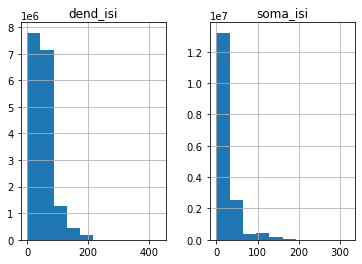

In [22]:
df[["dend_isi", "soma_isi"]].hist()

## Novelty detection

Plot all possible inputs to the decoder, but also keep track of which of these inputs are novel compared to the training data.

For this, we're using local outlier factor (LOF), which checks the distance of the points to it's nearest neighbors. When we now set the nearest neighbors to only include the training data, we have a metric to score how "novel" some generated input point is.

In [82]:
from sklearn.neighbors import LocalOutlierFactor
# normalisation constants
maxx, maxy, maxz = max(soma_isi[:, 0]), max(bottleneck_out[:,0]), max(dend_isi[:, 0])
# normalised data
data = np.array([(x, y, z) for x, y, z in zip(soma_isi[:,0]/maxx, bottleneck_out[:,0]/maxy, 
dend_isi[:,0]/maxz)])  # 3D training data
print(data.shape)

# Fit local outlier factor (LOF) to training data
lof = LocalOutlierFactor(novelty=True)
lof.fit(data)  # fit Local Outlier Factor to normalised space

Connection dropped: socket connection broken
Transition to CONNECTING
Session has expired


(16800000, 3)


In [24]:
from decoder_helper_functions import cartesian_product
%matplotlib inline
cb = I.plt.get_cmap('viridis')

# outdir = mdb_figs.create_managed_folder('figures', raise_ = False)
for weighted_input in tqdm(np.arange(-10, 15, .5)):
    # Construct full grid of possible decoder inputs with a specific dend_ISI
    bottleneck_values = I.np.array([weighted_input])
    soma_isi_inputs = I.np.arange(-0,150,1)
    ISI_dend_values = I.np.arange(100, 250)
    decoder_input = cartesian_product(bottleneck_values, soma_isi_inputs, ISI_dend_values)
    decoder_input_torch = torch.Tensor(decoder_input)

    # Calculate model outputs of all inputs
    model_out_torch = forward_decoder(model, decoder_input_torch)
    model_out_torch = torch.sigmoid(model_out_torch)
    model_out_ = model_out_torch.cpu().detach().numpy()

    # score inputs based on how close they are to training data
    to_score = np.array([
        (x/maxx, z/maxz, (dend_ISI+100)/maxz)
        for x, y in zip(decoder_input[:,1], decoder_input[:,2])
    ])
    scores  = lof.predict(to_score)

    c = [cb(model_out_[i])[0] if scores[i] > 0 else 
    np.append(cb(model_out_[i])[0][:3], .2) for i in range(len(scores))
    ]  # set alpha to .2 for inputs that are not close to training data

    I.plt.figure(dpi = 200)
    I.plt.scatter(decoder_input[:,1], -1*decoder_input[:,0], s=3, c=c)
    I.plt.xlabel('soma_isi')
    I.plt.ylabel('bottleneck_node')
    I.plt.title(f"dend_isi={dend_ISI} ms")
    I.plt.xlim(((0, 150)))
    I.plt.ylim(((-10, 15)))
    I.plt.colorbar()
    I.plt.clim(0, 1)
    I.plt.savefig(outdir.join('all_inputs_dend_isi={:03d}.png'.format(dend_ISI)))
    # I.plt.show()
    I.plt.close()

100%|██████████| 150/150 [05:19<00:00,  2.13s/it]
